In [1]:
import pickle as pkl
from simulator.rl_wrapper import CentralizedAggregatedSim, DecentralizedAggregatedSim
from simulator.fast_simulator import FastSimulator
from simulator.simulator import Simulator
import matplotlib
import matplotlib.pyplot as plt
import torch
from simulator.rl import RL, ActionSpace
import pandas as pd
import numpy as np
import seaborn as sns

action_space = ActionSpace()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
path_folder = "saved_models"

In [2]:
online_test = True

In [3]:
# change of population in a day

In [4]:
#fsim = FastSimulator(interval = 30, suffix='quicktest1')
# fsims = []
# for i in range(15, 20, 1):
#     fsim = FastSimulator(interval = 30, suffix=f'llm_robust_test_{i}')
#     fsims.append(fsim)
# len(fsims)

In [5]:
def get_df(suffix):
    fsim = FastSimulator(interval = 30, suffix=suffix)
    rsts = fsim.rsts
    pops = []
    pops_cummulative = []
    times = []
    t = 10
    for rst in rsts:
        t += fsim.interval / 60
        times.append(t)
        pops.append(rst.iloc[:, 1:-2].sum(axis=0))
        pops_cummulative.append(rst.iloc[:, 1:-2].sum().sum())

    df = pd.DataFrame(pops)
    df.index = times
    df.insert(0, 'Total Population', pops_cummulative)
    return df

In [16]:
dfs = []
for i in range(10):
    dfs.append(get_df(f'llm_robust_test_{i}'))

In [21]:
# plot confidence interval for all 10 runs at each time step

import numpy as np
agg_data = np.array(dfs)

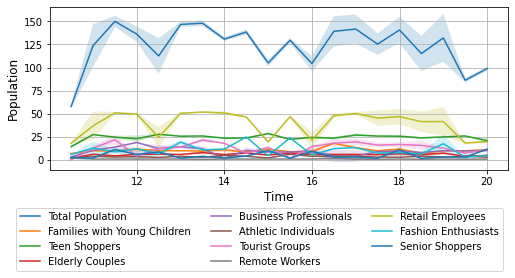

In [52]:
mean_ = agg_data.mean(axis=0)
std_ = agg_data.std(axis=0)

df_mean = pd.DataFrame(mean_, index=dfs[0].index, columns=dfs[0].columns)
df_std = pd.DataFrame(std_, index=dfs[0].index, columns=dfs[0].columns)
# plot confidence interval for all 10 runs at each time step
fig, ax = plt.subplots(figsize=(8.2, 3))
for label in df_mean.columns:
    df_mean[label].plot(linewidth=1.5, label=label, ax=ax)
    ax.fill_between(df_mean.index, df_mean[label] - df_std[label], df_mean[label] + df_std[label], alpha=0.2)
ax.legend(fontsize=12)
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, -0.65), ncol=3)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Population', fontsize=12)

plt.grid()
plt.show()

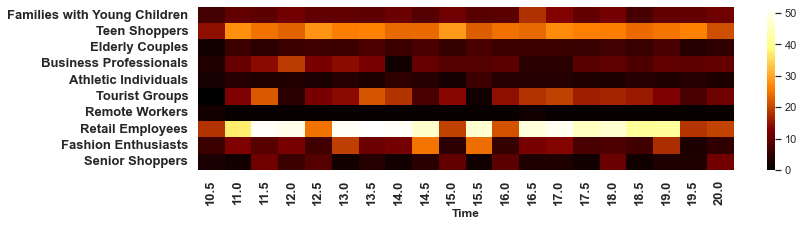

In [56]:
sns.set(rc={'figure.figsize':(12, 3)})
sns.heatmap(df_mean.iloc[:,1:].T, annot=False, cmap="afmhot", fmt=".0f")
plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold', rotation=90)
plt.show()

In [58]:
dfs[0]

,Total Population,Families with Young Children,Teen Shoppers,Elderly Couples,Business Professionals,Athletic Individuals,Tourist Groups,Remote Workers,Retail Employees,Fashion Enthusiasts,Senior Shoppers
10.5,59,7,13,2,6,2,0,2,18,6,3
11.0,142,10,28,6,11,4,15,1,49,16,2
11.5,154,10,25,4,14,3,25,1,52,8,12
12.0,128,10,20,6,19,4,4,1,49,12,3
12.5,101,10,28,8,8,3,11,1,19,6,7
13.0,146,10,26,6,15,4,14,1,49,19,2
13.5,150,10,26,9,14,3,20,1,52,11,4
14.0,133,10,25,6,2,5,18,1,52,12,2
14.5,136,10,23,8,8,4,7,1,46,25,4
15.0,107,11,29,5,9,3,14,1,20,3,12


In [184]:
def get_store_timely_data(suffix):
    fsim = FastSimulator(interval = 30, suffix=suffix)
    rsts = fsim.rsts

    df = np.array([rsts[i].iloc[:, 1:-2].sum(axis=1).values for i in range(len(rsts))])
    print(df.shape)
    df = pd.DataFrame(df)
    df.index = dfs[0].index
    df.columns = rsts[0]['Store'].values
    return df

In [185]:
store_dfs = []
for i in range(10):
    store_dfs.append(get_store_timely_data(f'llm_robust_test_{i}'))

(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)
(20, 20)


In [186]:
agg_store_df = np.array(store_dfs)
store_mean_ = agg_store_df.mean(axis=0)
store_mean_ = pd.DataFrame(store_mean_, index=store_dfs[0].index, columns=store_dfs[0].columns)

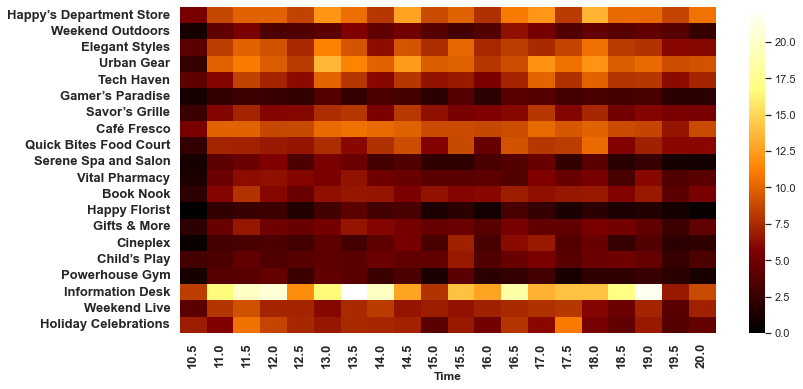

In [187]:
# plt heatmap of store population
sns.set(rc={'figure.figsize':(12, 6)})
sns.heatmap(store_mean_.T, annot=False, cmap="afmhot", fmt=".0f")
plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold', rotation=90)
plt.show()